In [2]:
from sklearn import *
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn import cross_validation
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster
from sklearn import model_selection

/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will 

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns #for graphics and figure styling
import pandas as pd

In [4]:
data = pd.read_csv('adult.data.txt', sep=", ", encoding='latin1', header=None)

/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [5]:
data.columns = ['Age', 'Status', 'Weight', 'Degree', 'Education', 'Married', 'Occupation', 'Relationship', 'Race', 'Sex', 'Gain', 'Loss', 'Hours', 'Country', 'Income']

In [6]:
data.head()

,Age,Status,Weight,Degree,Education,Married,Occupation,Relationship,Race,Sex,Gain,Loss,Hours,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age             32561 non-null int64
Status          32561 non-null object
Weight          32561 non-null int64
Degree          32561 non-null object
Education       32561 non-null int64
Married         32561 non-null object
Occupation      32561 non-null object
Relationship    32561 non-null object
Race            32561 non-null object
Sex             32561 non-null object
Gain            32561 non-null int64
Loss            32561 non-null int64
Hours           32561 non-null int64
Country         32561 non-null object
Income          32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
data = data.apply(LabelEncoder().fit_transform)

In [10]:
dataIncomeColumn = data.Income

In [11]:
dataIncomeColumn.head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int64

In [12]:
data= data.drop('Income', axis=1)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)

In [14]:
data

,Age,Status,Weight,Degree,Education,Married,Occupation,Relationship,Race,Sex,Gain,Loss,Hours,Country
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5
5,20,4,17700,12,13,2,4,5,4,0,0,0,39,39
6,32,4,8536,6,4,3,8,1,2,0,0,0,15,23
7,35,6,13620,11,8,2,4,0,4,1,0,0,44,39
8,14,4,1318,12,13,4,10,1,4,0,105,0,49,39
9,25,4,8460,9,12,2,4,0,4,1,79,0,39,39


In [15]:
standardized_data = scaler.transform(data)

In [16]:
data_Test = pd.read_csv('adult.test.txt', sep=", ", encoding='latin1', header=None)
data_Test.columns = ['Age', 'Status', 'Weight', 'Degree', 'Education', 'Married', 'Occupation', 'Relationship', 'Race', 'Sex', 'Gain', 'Loss', 'Hours', 'Country', 'Income']
enc = LabelEncoder()
data_Test = data_Test.apply(LabelEncoder().fit_transform)
data_TestIncomeColumn = data_Test.Income
data_Test=data_Test.drop('Income', axis=1)

/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [17]:
data_TestIncomeColumn.head()

0    0
1    0
2    1
3    1
4    0
Name: Income, dtype: int64

In [18]:
standardized_test_data = scaler.transform(data_Test)

In [19]:
standardized_test_data

array([[-0.99596883,  0.09005041, -0.25920377, ..., -0.20417671,
        -0.03112174,  0.16375118],
       [-0.04256059,  0.09005041, -1.42355156, ..., -0.20417671,
         0.79234242,  0.16375118],
       [-0.77595154, -1.28363502,  0.17211575, ..., -0.20417671,
        -0.03112174,  0.16375118],
       ...,
       [-0.04256059,  0.09005041,  0.25047737, ..., -0.20417671,
         0.79234242,  0.16375118],
       [ 0.39747397,  0.09005041, -1.45165594, ..., -0.20417671,
        -0.03112174,  0.16375118],
       [-0.26257788,  0.77689313, -0.65778996, ..., -0.20417671,
         1.61580658,  0.16375118]])

In [20]:
a=0
b=0
for col in data:
    for i in data[col].isnull():
        if i:
            a+=1
        b+=1
    print('Missing data in',col,'is',a/b*100,'%')
    a=0
    b=0
##check for missing data 
##so now, we have standardized_data and standardized_test_data that we can run our models on

Missing data in Age is 0.0 %
Missing data in Status is 0.0 %
Missing data in Weight is 0.0 %
Missing data in Degree is 0.0 %
Missing data in Education is 0.0 %
Missing data in Married is 0.0 %
Missing data in Occupation is 0.0 %
Missing data in Relationship is 0.0 %
Missing data in Race is 0.0 %
Missing data in Sex is 0.0 %
Missing data in Gain is 0.0 %
Missing data in Loss is 0.0 %
Missing data in Hours is 0.0 %
Missing data in Country is 0.0 %


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
censusIDM = RandomForestClassifier(max_depth=3, random_state=0)
from sklearn.feature_selection import RFE
rfe = RFE(censusIDM, n_features_to_select=6)
rfe.fit(standardized_data, dataIncomeColumn)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
  n_features_to_select=6, step=1, verbose=0)

In [22]:
rfe.ranking_

array([1, 6, 9, 2, 1, 1, 5, 1, 8, 3, 1, 4, 1, 7])

In [23]:
predict_TestOutput=rfe.predict(standardized_test_data)
predictOutput=rfe.predict(standardized_data)
#standardized_data for the training

In [24]:
goodTest=(predict_TestOutput==data_TestIncomeColumn).sum();print(goodTest)
good=(predictOutput==dataIncomeColumn).sum();print(good)
#good=(predictOutput==dataIncomeColumn).sum();good - for training error#

13606
27347


In [56]:
badTest=(predict_TestOutput!=data_TestIncomeColumn).sum();print(badTest)
bad=(predictOutput!=dataIncomeColumn).sum();print(bad)

2675
5214


In [57]:
good/(good+bad)*100

83.98697828690766

In [58]:
goodTest/(goodTest+badTest)*100

83.56980529451508

In [59]:
#Using the Random Forest Classifier on our Data, with depth 3.
censusIDM = RandomForestClassifier(max_depth=3, random_state=0)
frfe = RFE(censusIDM, n_features_to_select=3)
frfe.fit(standardized_data, dataIncomeColumn)
print(frfe.ranking_)
predict_TestOutput=frfe.predict(standardized_test_data)
predictOutput=frfe.predict(standardized_data)
goodTest=(predict_TestOutput==data_TestIncomeColumn).sum();print(goodTest)
good=(predictOutput==dataIncomeColumn).sum();print(good)
badTest=(predict_TestOutput!=data_TestIncomeColumn).sum();print(badTest)
bad=(predictOutput!=dataIncomeColumn).sum();print(bad)

[ 3  9 12  5  1  2  8  1 11  6  1  7  4 10]
13623
27354
2658
5207


In [23]:
#Using the Random Forest Classifier on our Data, with depth 7.
censusIDM = RandomForestClassifier(max_depth=7, random_state=0)
frfe = RFE(censusIDM, n_features_to_select=3)
frfe.fit(standardized_data, dataIncomeColumn)
print(frfe.ranking_)
predict_TestOutput=frfe.predict(standardized_test_data)
predictOutput=frfe.predict(standardized_data)
goodTest=(predict_TestOutput==data_TestIncomeColumn).sum();print(goodTest)
good=(predictOutput==dataIncomeColumn).sum();print(good)
badTest=(predict_TestOutput!=data_TestIncomeColumn).sum();print(badTest)
bad=(predictOutput!=dataIncomeColumn).sum();print(bad)

NameError: name 'RandomForestClassifier' is not defined

In [38]:
#Testing the Linear Regression Model on a large numer of different features to select to see if the accuracy changes significantly or not
from sklearn.linear_model import LinearRegression
beerIDM = linear_model.LogisticRegression()
rfe2 = RFE(beerIDM, n_features_to_select=4)
rfe2.fit(standardized_data, dataIncomeColumn)
print(rfe2.ranking_)
predict_TestOutput=frfe.predict(standardized_test_data)
predictOutput=frfe.predict(standardized_data)
goodTest=(predict_TestOutput==data_TestIncomeColumn).sum();print(goodTest)
good=(predictOutput==dataIncomeColumn).sum();print(good)
badTest=(predict_TestOutput!=data_TestIncomeColumn).sum();print(badTest)
bad=(predictOutput!=dataIncomeColumn).sum();print(bad)
good/(good+bad)

[ 1 10  8  7  1  3  9  5  6  1  1  4  2 11]
13623
27354
2658
5207


0.8400847639814502

In [44]:
for i in [1,2,3,4,5,6,7,8,9,10]:
    print("For depth = ", i)
    censusIDM = RandomForestClassifier(max_depth=i, random_state=0)
    rfe = RFE(censusIDM, n_features_to_select=4)
    rfe.fit(standardized_data, dataIncomeColumn)
    print(rfe.ranking_)
    predict_TestOutput=rfe.predict(standardized_test_data)
    predictOutput=rfe.predict(standardized_data)
    #Predictive Accuracy
    goodTest=(predict_TestOutput==data_TestIncomeColumn).sum();print(goodTest)
    good=(predictOutput==dataIncomeColumn).sum();print(good)
    badTest=(predict_TestOutput!=data_TestIncomeColumn).sum();print(badTest)
    bad=(predictOutput!=dataIncomeColumn).sum();print(bad)


For depth =  1
[10 11  9  8  7  1  6  1  4  1  1  3  5  2]
12891
25769
3390
6792
For depth =  2
[ 2  9 11  7  1  1  8  1 10  5  1  4  3  6]
13080
26166
3201
6395
For depth =  3
[ 2  8 11  4  1  1  7  1 10  5  1  6  3  9]
13616
27358
2665
5203
For depth =  4
[ 3  8 11  4  1  1  7  1  9  5  1  6  2 10]
13707
27520
2574
5041
For depth =  5
[ 3  8  9  4  1  1  7  1 10  6  1  2  5 11]
13707
27558
2574
5003
For depth =  6
[ 1  8  9  4  1  6  7  1 10  5  1  2  3 11]
13731
27590
2550
4971
For depth =  7
[ 3  9  8  4  1  1  6  1 11  7  1  2  5 10]
13679
27658
2602
4903
For depth =  8
[ 3  9  8  5  1  1  6  1 11  7  1  2  4 10]
13678
27702
2603
4859
For depth =  9
[ 3  9  8  5  1  1  6  1 11  7  1  2  4 10]
13555
27710
2726
4851
For depth =  10
[ 2  9  8  5  1  1  6  1 11  7  1  3  4 10]
13653
27721
2628
4840


In [51]:
#Linear Model Lasso curently not working.
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
rfe = RFE(clf, n_features_to_select=4)
rfe.fit(standardized_data, dataIncomeColumn)
print(rfe.ranking_)
predict_TestOutput=rfe.predict(standardized_test_data)
predictOutput=rfe.predict(standardized_data)
#Predictive Accuracy
goodTest=(predict_TestOutput==data_TestIncomeColumn).sum();print(goodTest)
good=(predictOutput==dataIncomeColumn).sum();print(good)
badTest=(predict_TestOutput!=data_TestIncomeColumn).sum();print(badTest)
bad=(predictOutput!=dataIncomeColumn).sum();print(bad)



[11 10  9  8  7  6  5  4  3  2  1  1  1  1]
0
0
16281
32561


In [52]:
#Running the Perceptron Model on our data
from sklearn.linear_model import Perceptron
clf = linear_model.Perceptron()
rfe = RFE(clf, n_features_to_select=4)
rfe.fit(standardized_data, dataIncomeColumn)
print(rfe.ranking_)
predict_TestOutput=rfe.predict(standardized_test_data)
predictOutput=rfe.predict(standardized_data)
#Predictive Accuracy
goodTest=(predict_TestOutput==data_TestIncomeColumn).sum();print(goodTest)
good=(predictOutput==dataIncomeColumn).sum();print(good)
badTest=(predict_TestOutput!=data_TestIncomeColumn).sum();print(badTest)
bad=(predictOutput!=dataIncomeColumn).sum();print(bad)

C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Victoria\Anaconda3\lib\site-packages\skle

[ 4 11  1 10  2  5  8  6  3  1  1  1  7  9]
12944
25157
3337
7404


C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Victoria\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Victoria\Anaconda3\lib\site-packages\skle

In [67]:
#k-nearest Neighbors
from sklearn.neighbors import NearestNeighbors
clf = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(standardized_data)
rfe = RFE(clf, n_features_to_select=4)
rfe.fit(standardized_data, dataIncomeColumn)
print(rfe.ranking_)
predict_TestOutput=rfe.predict(standardized_test_data)
predictOutput=rfe.predict(standardized_data)
#Predictive Accuracy
goodTest=(predict_TestOutput==data_TestIncomeColumn).sum();print(goodTest)
good=(predictOutput==dataIncomeColumn).sum();print(good)
badTest=(predict_TestOutput!=data_TestIncomeColumn).sum();print(badTest)
bad=(predictOutput!=dataIncomeColumn).sum();print(bad)

RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

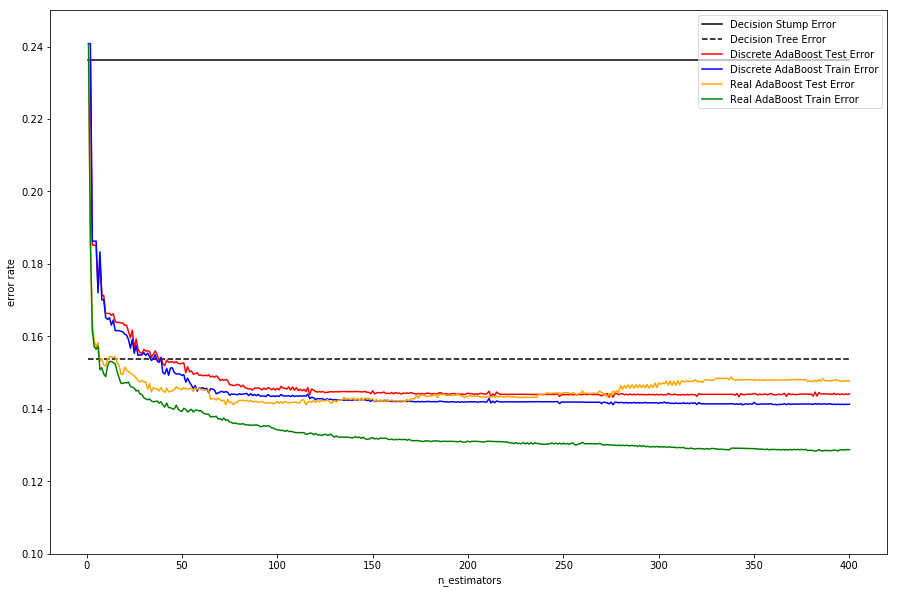

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import AdaBoostClassifier
n_estimators = 400
# A learning rate of 1. may not be optimal for both SAMME and SAMME.R
learning_rate = 1.
dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1)
dt.fit(standardized_data, dataIncomeColumn)
dt_err = 1.0 - dt.score(standardized_test_data, data_TestIncomeColumn)
dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(standardized_data, dataIncomeColumn)
dt_stump_err = 1.0 - dt_stump.score(standardized_test_data, data_TestIncomeColumn)
ada_real = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME.R")
ada_discrete = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME")
ada_discrete.fit(standardized_data, dataIncomeColumn)
ada_real.fit(standardized_data, dataIncomeColumn)
fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot(111)

ax.plot([1, n_estimators], [dt_stump_err] * 2, 'k-',
        label='Decision Stump Error')
ax.plot([1, n_estimators], [dt_err] * 2, 'k--',
        label='Decision Tree Error')

ada_discrete_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(standardized_test_data)):
    ada_discrete_err[i] = zero_one_loss(y_pred, data_TestIncomeColumn)

ada_discrete_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(standardized_data)):
    ada_discrete_err_train[i] = zero_one_loss(y_pred, dataIncomeColumn)

ada_real_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(standardized_test_data)):
    ada_real_err[i] = zero_one_loss(y_pred, data_TestIncomeColumn)

ada_real_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(standardized_data)):
    ada_real_err_train[i] = zero_one_loss(y_pred, dataIncomeColumn)

ax.plot(np.arange(n_estimators) + 1, ada_discrete_err,
        label='Discrete AdaBoost Test Error',
        color='red')
ax.plot(np.arange(n_estimators) + 1, ada_discrete_err_train,
        label='Discrete AdaBoost Train Error',
        color='blue')
ax.plot(np.arange(n_estimators) + 1, ada_real_err,
        label='Real AdaBoost Test Error',
        color='orange')
ax.plot(np.arange(n_estimators) + 1, ada_real_err_train,
        label='Real AdaBoost Train Error',
        color='green')

ax.set_ylim((0.1, 0.25))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()
fig.savefig("ada.pdf", bbox_inches='tight')

Automatically created module for IPython interactive environment


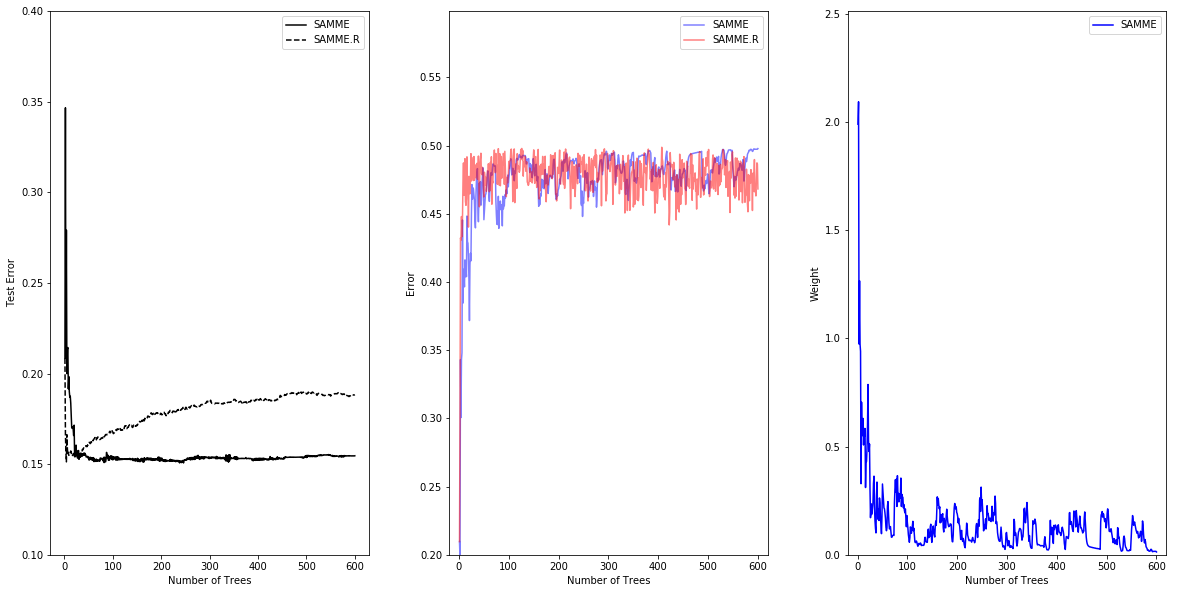

In [31]:
print(__doc__)

# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

from sklearn.externals.six.moves import zip

import matplotlib.pyplot as plt

from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


X = np.concatenate((standardized_data, standardized_test_data))
y = np.concatenate((dataIncomeColumn, data_TestIncomeColumn))

n_split = 3000

X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_train_predict in zip(
        bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)):
    real_test_errors.append(
        1. - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict, y_test))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

fig1=plt.figure(figsize=(20, 10))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='black', label='SAMME')
plt.plot(range(1, n_trees_real + 1),
         real_test_errors, c='black',
         linestyle='dashed', label='SAMME.R')
plt.legend()
plt.ylim(0.1, 0.4)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')

plt.subplot(132)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME', alpha=.5)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
         "r", label='SAMME.R', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
         "b", label='SAMME')
plt.legend()
plt.ylabel('Weight')
plt.xlabel('Number of Trees')
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()
fig1.savefig("ada1.pdf", bbox_inches='tight')